In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# **1. Diabetes Datasets**

In [198]:
# os.chdir('/content/drive/My Drive/BCML/datasets')
os.listdir('.')
filename = 'pima-indians-diabetes.csv'
datasets = pd.read_csv(filename)

In [199]:
# for i in range(768):
#   if datasets.loc[i,'SkinThickness'] == 35:
#     print('bener')
#     datasets.loc[i,'SkinThickness'] = 7

In [168]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [196]:
datasets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,25.250846,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,10.659513,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,15.950000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


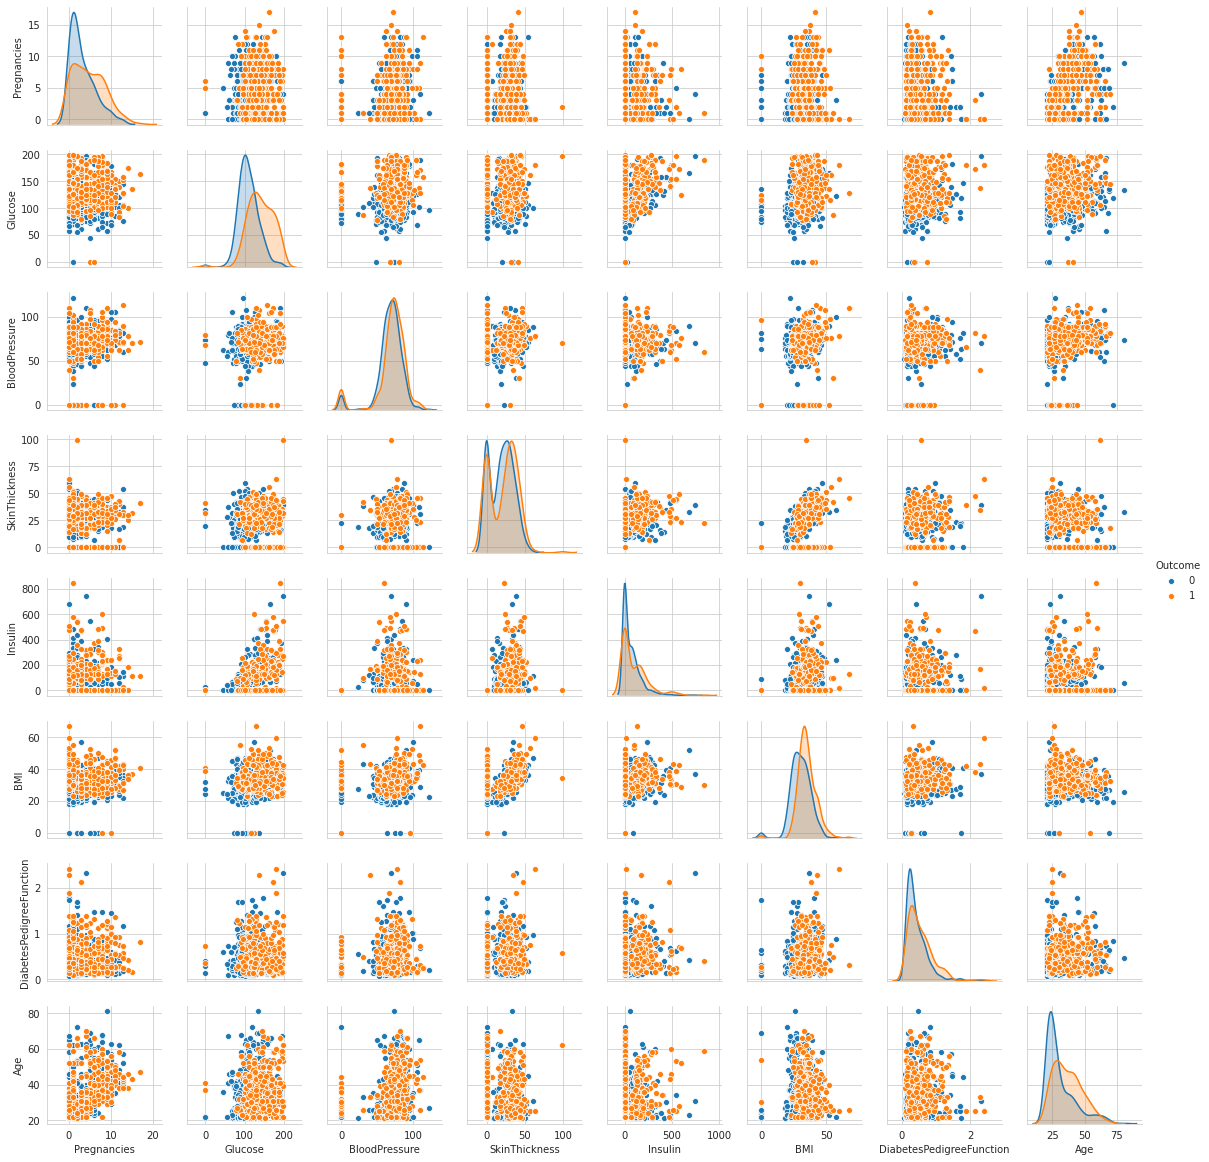

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(datasets, hue="Outcome", size=2);
plt.show()

In [80]:
print(datasets['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


coba data cleaning

In [201]:
arr=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
mean=[31.97,19.35,15.95,115.24,7.88]
for index,value in enumerate(datasets):
  datasets_coba = len(datasets[datasets[value]==0])
  print('jumlah yang bernilai 0 pada kolom {} adalah {}'.format(value,datasets_coba))

for index in range(len(datasets)):
  if datasets.loc[index,'SkinThickness'] == 0:
    datasets.loc[index,'SkinThickness'] = 15.95

a=np.array(datasets['SkinThickness'])
a
# len(a)

jumlah yang bernilai 0 pada kolom Pregnancies adalah 111
jumlah yang bernilai 0 pada kolom Glucose adalah 5
jumlah yang bernilai 0 pada kolom BloodPressure adalah 35
jumlah yang bernilai 0 pada kolom SkinThickness adalah 0
jumlah yang bernilai 0 pada kolom Insulin adalah 374
jumlah yang bernilai 0 pada kolom BMI adalah 11
jumlah yang bernilai 0 pada kolom DiabetesPedigreeFunction adalah 0
jumlah yang bernilai 0 pada kolom Age adalah 0
jumlah yang bernilai 0 pada kolom Outcome adalah 500


In [89]:

scaler = preprocessing.StandardScaler()
feature_used= datasets.drop(['Outcome'],axis=1)
label = datasets['Outcome']

feature_scaled =scaler.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.1,random_state=4)

# print(feature_train.value_counts())
# print(feature_test.value_counts())
# print(label_train.value_counts())
# print(label_test.value_counts())

algoritma=[RandomForestClassifier,KNeighborsClassifier,SVC,LinearSVC,GaussianNB,BernoulliNB,LogisticRegression,LinearDiscriminantAnalysis,DecisionTreeClassifier,xgb.XGBClassifier]


In [83]:
#sebelum balancing
print('nilai 0 = ',len(label_train[label_train==0]))
print('nilai 1 = ',len(label_train[label_train==1]))

nilai 0 =  449
nilai 1 =  242


In [90]:
smt=SMOTE()
feature_train,label_train=smt.fit_sample(feature_train,label_train)
print(np.bincount(label_train))

[449 449]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [93]:
for index,value in enumerate(algoritma):
  if value == RandomForestClassifier:
    classifier = value(n_estimators=5, bootstrap=True, max_features = "sqrt")
    classifier.fit(feature_train, label_train)
  elif value == KNeighborsClassifier:
    classifier = value(13)
    classifier.fit(feature_train, label_train)
  elif value == SVC:
    kernels=["linear","poly","rbf"]
    for index,value_ker in enumerate(kernels):
      svc_classifier = SVC(kernel = value_ker)
      svc_classifier.fit(feature_train, label_train)
      # prediction
      prediction = svc_classifier.predict(feature_test)
      #hasil
      print('Accuracy of SVC with Kernel {} on test set: {:.2f}'.format(value_ker,svc_classifier.score(feature_test, label_test))) # .score() -> Accuracy
      print(f1_score(label_test, prediction, average='macro'))
      print(precision_score(label_test, prediction, average='macro'))
      print(recall_score(label_test, prediction, average='macro'),'\n')
    continue
  elif value == xgb.XGBClassifier:
    classifier = value(n_estimators=5,learning_rate=0.1,colsample_bytree=0.3,max_depth=5)
    classifier.fit(feature_train, label_train)
  else:
    classifier = value()
    classifier.fit(feature_train, label_train)
  
  # prediction
  prediction = classifier.predict(feature_test)
  #hasil
  print('Accuracy of {} on test set: {:.2f}'.format(value,classifier.score(feature_test, label_test))) # .score() -> Accuracy
  print(f1_score(label_test, prediction, average='macro'))
  print(precision_score(label_test, prediction, average='macro'))
  print(recall_score(label_test, prediction, average='macro'),'\n')


Accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> on test set: 0.66
0.6404454022988506
0.6388888888888888
0.6508295625942685 

Accuracy of <class 'sklearn.neighbors._classification.KNeighborsClassifier'> on test set: 0.75
0.7448107448107448
0.7472972972972973
0.7760180995475113 

Accuracy of SVC with Kernel linear on test set: 0.77
0.7433333333333334
0.739795918367347
0.7481146304675717 

Accuracy of SVC with Kernel poly on test set: 0.75
0.7156462585034014
0.7242351046698873
0.7100301659125188 

Accuracy of SVC with Kernel rbf on test set: 0.71
0.7059027777777778
0.7122132253711202
0.7371794871794872 

Accuracy of <class 'sklearn.svm._classes.LinearSVC'> on test set: 0.77
0.7433333333333334
0.739795918367347
0.7481146304675717 

Accuracy of <class 'sklearn.naive_bayes.GaussianNB'> on test set: 0.69
0.6681034482758621
0.665625
0.6798642533936652 

Accuracy of <class 'sklearn.naive_bayes.BernoulliNB'> on test set: 0.66
0.6490182328190743
0.6524390243902439
0.66968325

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


berdasarkan hasil perhitungan akurasi diatas akurasi yang terbaik dengan perbandingan 90:10 ialah algoritma KNN dan XGBoost yang berasda di 81%

# **2. Heart Dataset**

In [85]:
filename = 'heart.csv'
datasets_heart = pd.read_csv(filename)

In [86]:
# datasets_heart.head()
# datasets_heart.info()
datasets_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


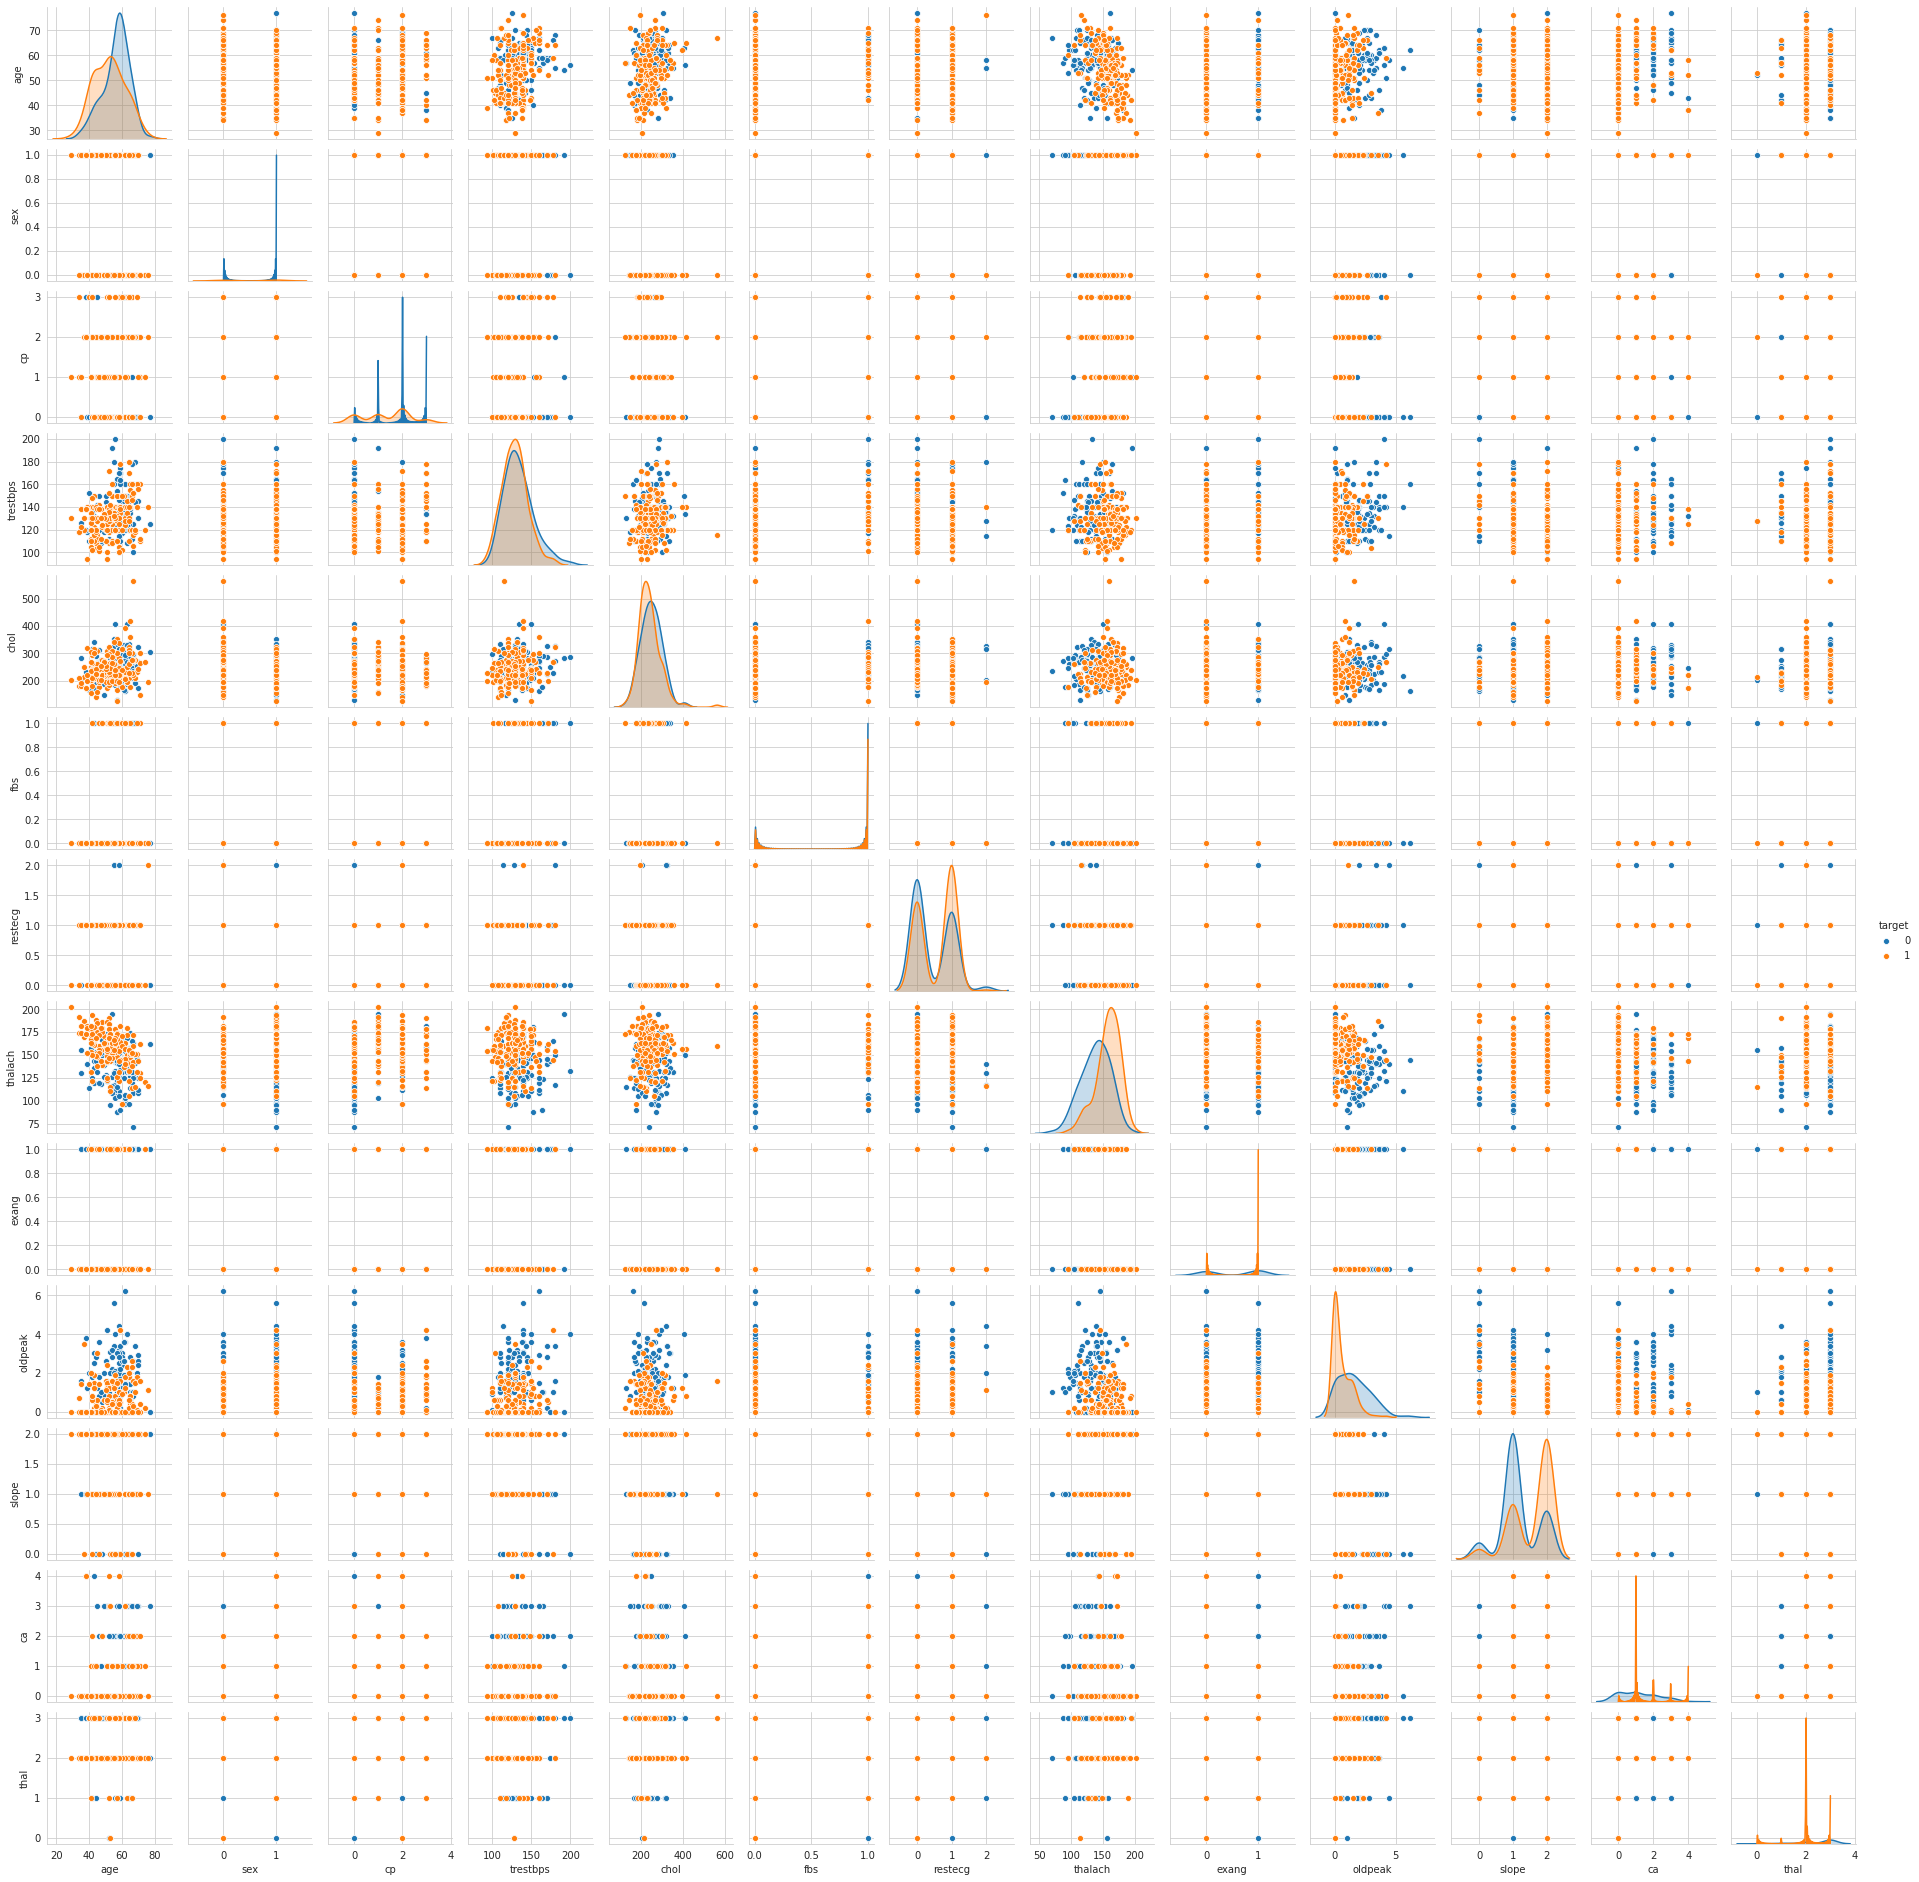

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(datasets_heart, hue="target", size=2,);
plt.show()

In [87]:
scaler = preprocessing.StandardScaler()
feature_used_heart= datasets_heart.drop(['target'],axis=1)
label_heart = datasets_heart['target']

feature_scaled_heart =scaler.fit_transform(feature_used_heart.values)
feature_train_heart, feature_test_heart,label_train_heart, label_test_heart = train_test_split(feature_scaled_heart, label_heart, test_size=0.1,random_state=4)

print('nilai 0 = ',len(label_train_heart[label_train_heart==0]))
print('nilai 1 = ',len(label_train_heart[label_train_heart==1]))

smt=SMOTE()
feature_train_heart,label_train_heart=smt.fit_sample(feature_train_heart,label_train_heart)
print(np.bincount(label_train_heart))

algoritma=[RandomForestClassifier,KNeighborsClassifier,SVC,LinearSVC,GaussianNB,BernoulliNB,LogisticRegression,LinearDiscriminantAnalysis,DecisionTreeClassifier,xgb.XGBClassifier]


nilai 0 =  125
nilai 1 =  147
[147 147]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
for index,value in enumerate(algoritma):
  if value == RandomForestClassifier:
    classifier = value(n_estimators=5, bootstrap=True, max_features = "sqrt")
    classifier.fit(feature_train_heart, label_train_heart)
  elif value == KNeighborsClassifier:
    classifier = value(13)
    classifier.fit(feature_train_heart, label_train_heart)
  elif value == SVC:
    kernels=["linear","poly","rbf"]
    for index,value_ker in enumerate(kernels):
      svc_classifier = SVC(kernel = value_ker)
      svc_classifier.fit(feature_train_heart, label_train_heart)
      # prediction
      prediction = svc_classifier.predict(feature_test_heart)
      #hasil
      print('Accuracy of SVC with Kernel {} on test set: {:.2f}'.format(value_ker,svc_classifier.score(feature_test_heart, label_test_heart))) # .score() -> Accuracy
      print(f1_score(label_test_heart, prediction, average='macro'))
      print(precision_score(label_test_heart, prediction, average='macro'))
      print(recall_score(label_test_heart, prediction, average='macro'),'\n')
    continue
  elif value == xgb.XGBClassifier:
    classifier = value(n_estimators=1000,learning_rate=0.1,colsample_bytree=0.3,max_depth=5)
    classifier.fit(feature_train_heart, label_train_heart)
  else:
    classifier = value()
    classifier.fit(feature_train_heart, label_train_heart)
  
  # prediction
  prediction = classifier.predict(feature_test_heart)
  #hasil
  print('Accuracy of {} on test set: {:.2f}'.format(value,classifier.score(feature_test_heart, label_test_heart))) # .score() -> Accuracy
  print(f1_score(label_test_heart, prediction, average='macro'))
  print(precision_score(label_test_heart, prediction, average='macro'))
  print(recall_score(label_test_heart, prediction, average='macro'),'\n')


Accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> on test set: 0.77
0.7479674796747968
0.8070652173913043
0.7414529914529915 

Accuracy of <class 'sklearn.neighbors._classification.KNeighborsClassifier'> on test set: 0.77
0.7703703703703704
0.76890756302521
0.7735042735042735 

Accuracy of SVC with Kernel linear on test set: 0.94
0.9320175438596492
0.95
0.9230769230769231 

Accuracy of SVC with Kernel poly on test set: 0.81
0.8012820512820513
0.8012820512820513
0.8012820512820513 

Accuracy of SVC with Kernel rbf on test set: 0.81
0.8046218487394958
0.8041666666666667
0.811965811965812 

Accuracy of <class 'sklearn.svm._classes.LinearSVC'> on test set: 0.90
0.8994594594594594
0.9057017543859649
0.8952991452991452 

Accuracy of <class 'sklearn.naive_bayes.GaussianNB'> on test set: 0.87
0.8640350877192982
0.8795454545454545
0.8568376068376069 

Accuracy of <class 'sklearn.naive_bayes.BernoulliNB'> on test set: 0.90
0.9015873015873016
0.8991596638655461
0.9059829059829

Untuk data set Heart.csv akurasi yang terbaik dengan perbandingan 90:10 adalah SVC dengan kernel linear dan Linear Discriminant Analysis yang berada di 94%

# **3. Sonar**

In [56]:
filename = 'sonar.csv'
datasets_sonar = pd.read_csv(filename)

In [ ]:
datasets_sonar.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [5]:
# datasets_sonar.info()
datasets_sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,

In [57]:
scaler = preprocessing.StandardScaler()
feature_used_sonar= datasets_sonar.drop(['Class'],axis=1)
label_sonar = datasets_sonar['Class']

feature_scaled_sonar =scaler.fit_transform(feature_used_sonar.values)
feature_train_sonar, feature_test_sonar,label_train_sonar, label_test_sonar = train_test_split(feature_scaled_sonar, label_sonar, test_size=0.1,random_state=4)

smt=SMOTE()
feature_train_sonar,label_train_sonar=smt.fit_sample(feature_train_sonar,label_train_sonar)
print(np.bincount(label_train_sonar))

algoritma=[RandomForestClassifier,KNeighborsClassifier,SVC,LinearSVC,GaussianNB,BernoulliNB,LogisticRegression,LinearDiscriminantAnalysis,DecisionTreeClassifier,xgb.XGBClassifier]


[100 100]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [58]:
for index,value in enumerate(algoritma):
  if value == RandomForestClassifier:
    classifier = value(n_estimators=5, bootstrap=True, max_features = "sqrt")
    classifier.fit(feature_train_sonar, label_train_sonar)
  elif value == KNeighborsClassifier:
    classifier = value(13)
    classifier.fit(feature_train_sonar, label_train_sonar)
  elif value == SVC:
    kernels=["linear","poly","rbf"]
    for index,value_ker in enumerate(kernels):
      svc_classifier = SVC(kernel = value_ker)
      svc_classifier.fit(feature_train_sonar, label_train_sonar)
      # prediction
      prediction = svc_classifier.predict(feature_test_sonar)
      #hasil
      print('Accuracy of SVC with Kernel {} on test set: {:.2f}'.format(value_ker,svc_classifier.score(feature_test_sonar, label_test_sonar))) # .score() -> Accuracy
      print(f1_score(label_test_sonar, prediction, average='macro'))
      print(precision_score(label_test_sonar, prediction, average='macro'))
      print(recall_score(label_test_sonar, prediction, average='macro'),'\n')
    continue
  elif value == xgb.XGBClassifier:
    classifier = value(n_estimators=1000,learning_rate=0.1,colsample_bytree=0.3,max_depth=5)
    classifier.fit(feature_train_sonar, label_train_sonar)
  else:
    classifier = value()
    classifier.fit(feature_train_sonar, label_train_sonar)
  # prediction
  prediction = classifier.predict(feature_test_sonar)
  #hasil
  print('Accuracy of {} on test set: {:.2f}'.format(value,classifier.score(feature_test_sonar, label_test_sonar))) # .score() -> Accuracy
  print(f1_score(label_test_sonar, prediction, average='macro'))
  print(precision_score(label_test_sonar, prediction, average='macro'))
  print(recall_score(label_test_sonar, prediction, average='macro'),'\n')

Accuracy of <class 'sklearn.ensemble._forest.RandomForestClassifier'> on test set: 0.57
0.5675057208237986
0.5694444444444444
0.5681818181818181 

Accuracy of <class 'sklearn.neighbors._classification.KNeighborsClassifier'> on test set: 0.76
0.7597254004576658
0.7638888888888888
0.759090909090909 

Accuracy of SVC with Kernel linear on test set: 0.76
0.761904761904762
0.7636363636363637
0.7636363636363637 

Accuracy of SVC with Kernel poly on test set: 0.90
0.9045454545454545
0.9045454545454545
0.9045454545454545 

Accuracy of SVC with Kernel rbf on test set: 0.95
0.9519450800915332
0.9583333333333333
0.95 

Accuracy of <class 'sklearn.svm._classes.LinearSVC'> on test set: 0.76
0.7597254004576658
0.7638888888888888
0.759090909090909 

Accuracy of <class 'sklearn.naive_bayes.GaussianNB'> on test set: 0.67
0.6636155606407322
0.6826923076923077
0.6727272727272727 

Accuracy of <class 'sklearn.naive_bayes.BernoulliNB'> on test set: 0.62
0.6111111111111112
0.6201923076923077
0.6136363636363

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy of <class 'xgboost.sklearn.XGBClassifier'> on test set: 0.90
0.9027777777777778
0.9230769230769231
0.9 



untuk datasets sonar.csv akurasi tertinggi di peroleh oleh SVC dengan kernel rbf yang berada di 95%